In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
df=pd.DataFrame(load_breast_cancer()['data'],columns=load_breast_cancer()['feature_names'])
df['target']=load_breast_cancer()['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.value_counts('target')

target
1    357
0    212
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

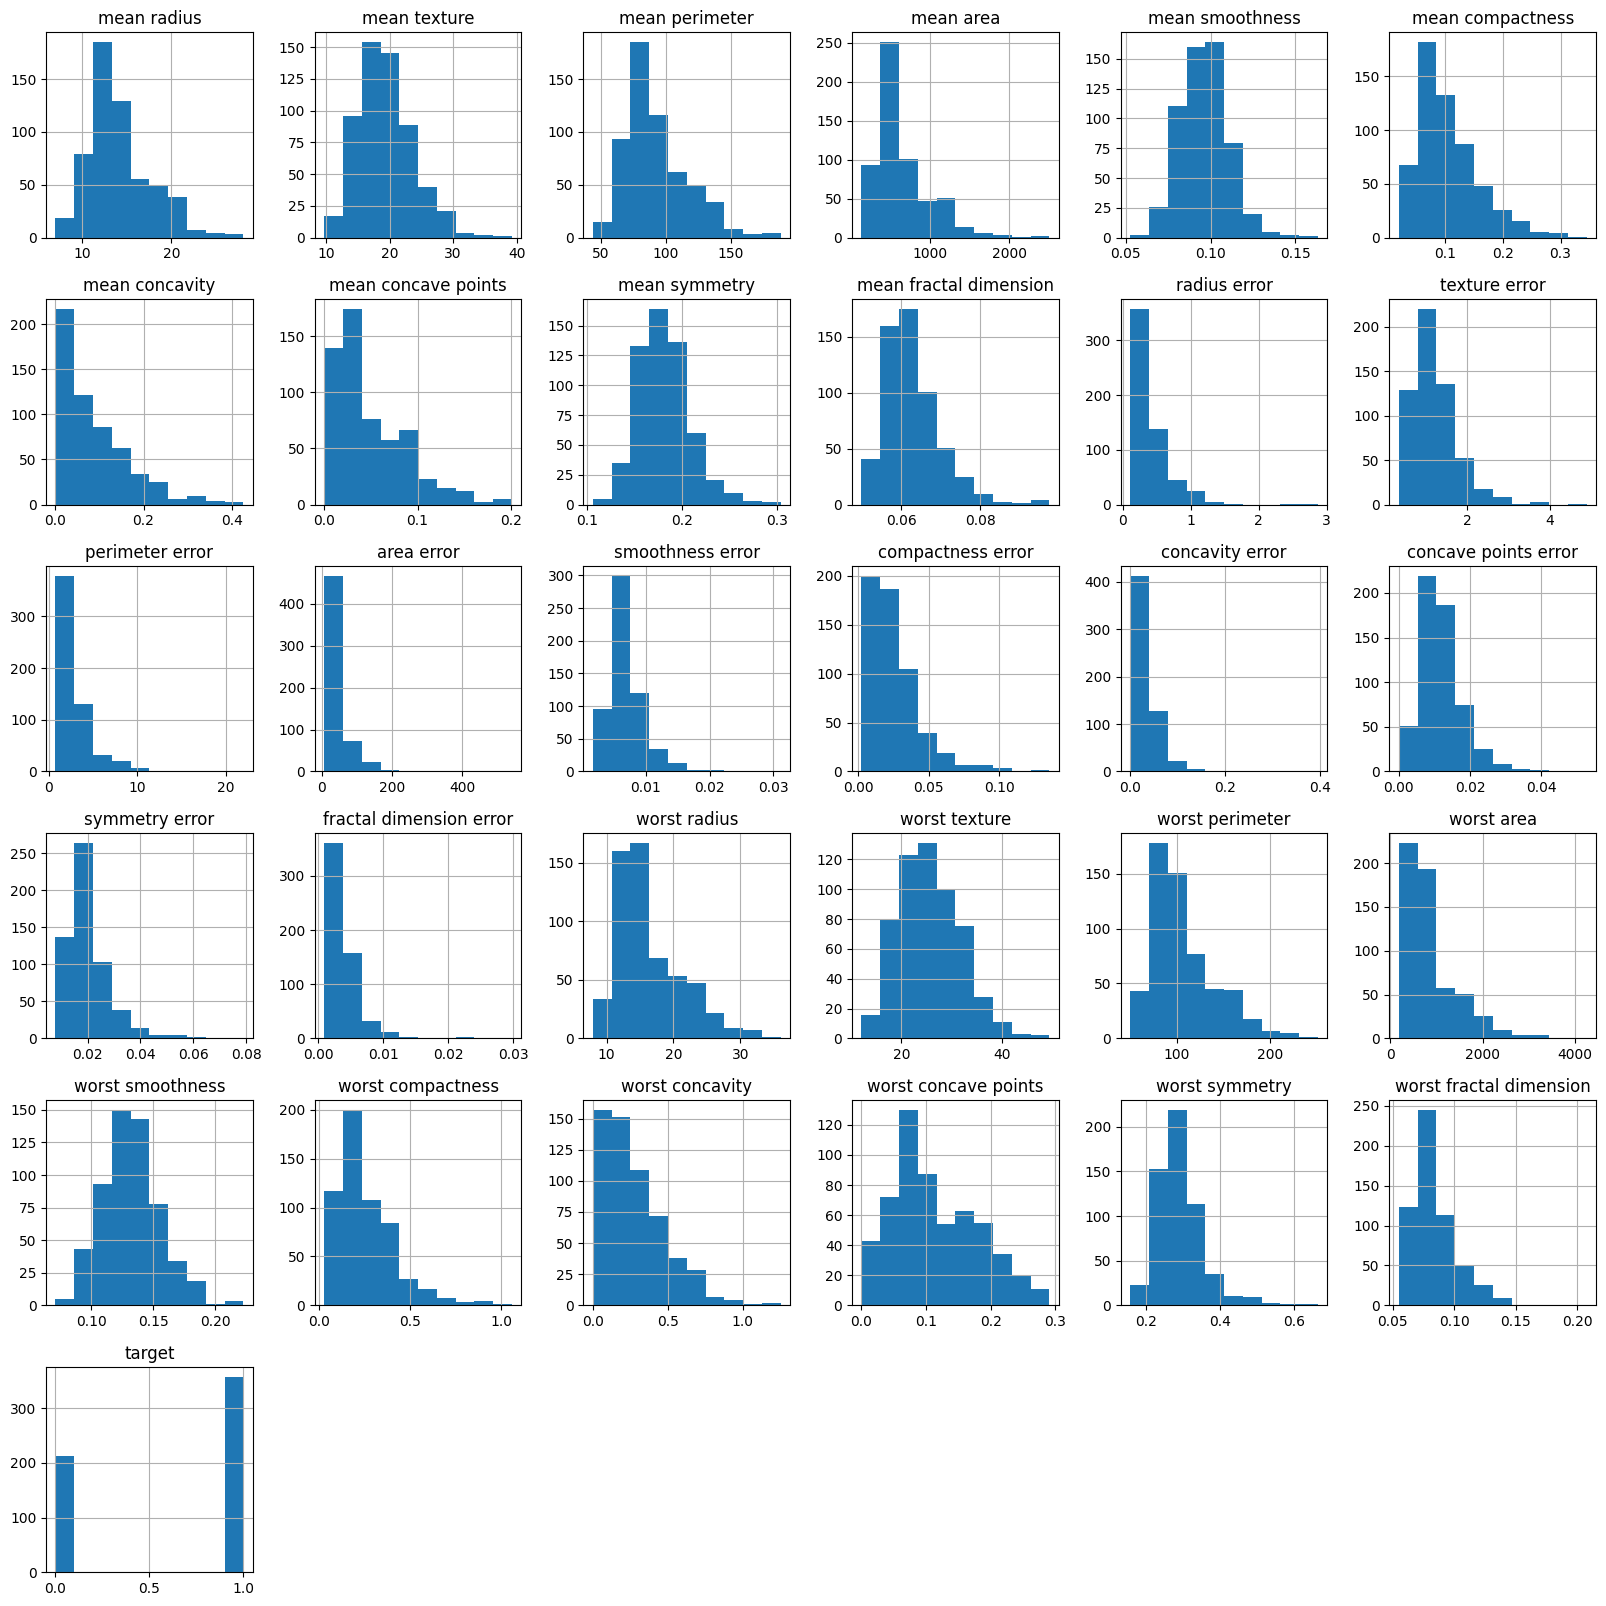

In [6]:
df.hist(figsize=(20,20))
plt.show()

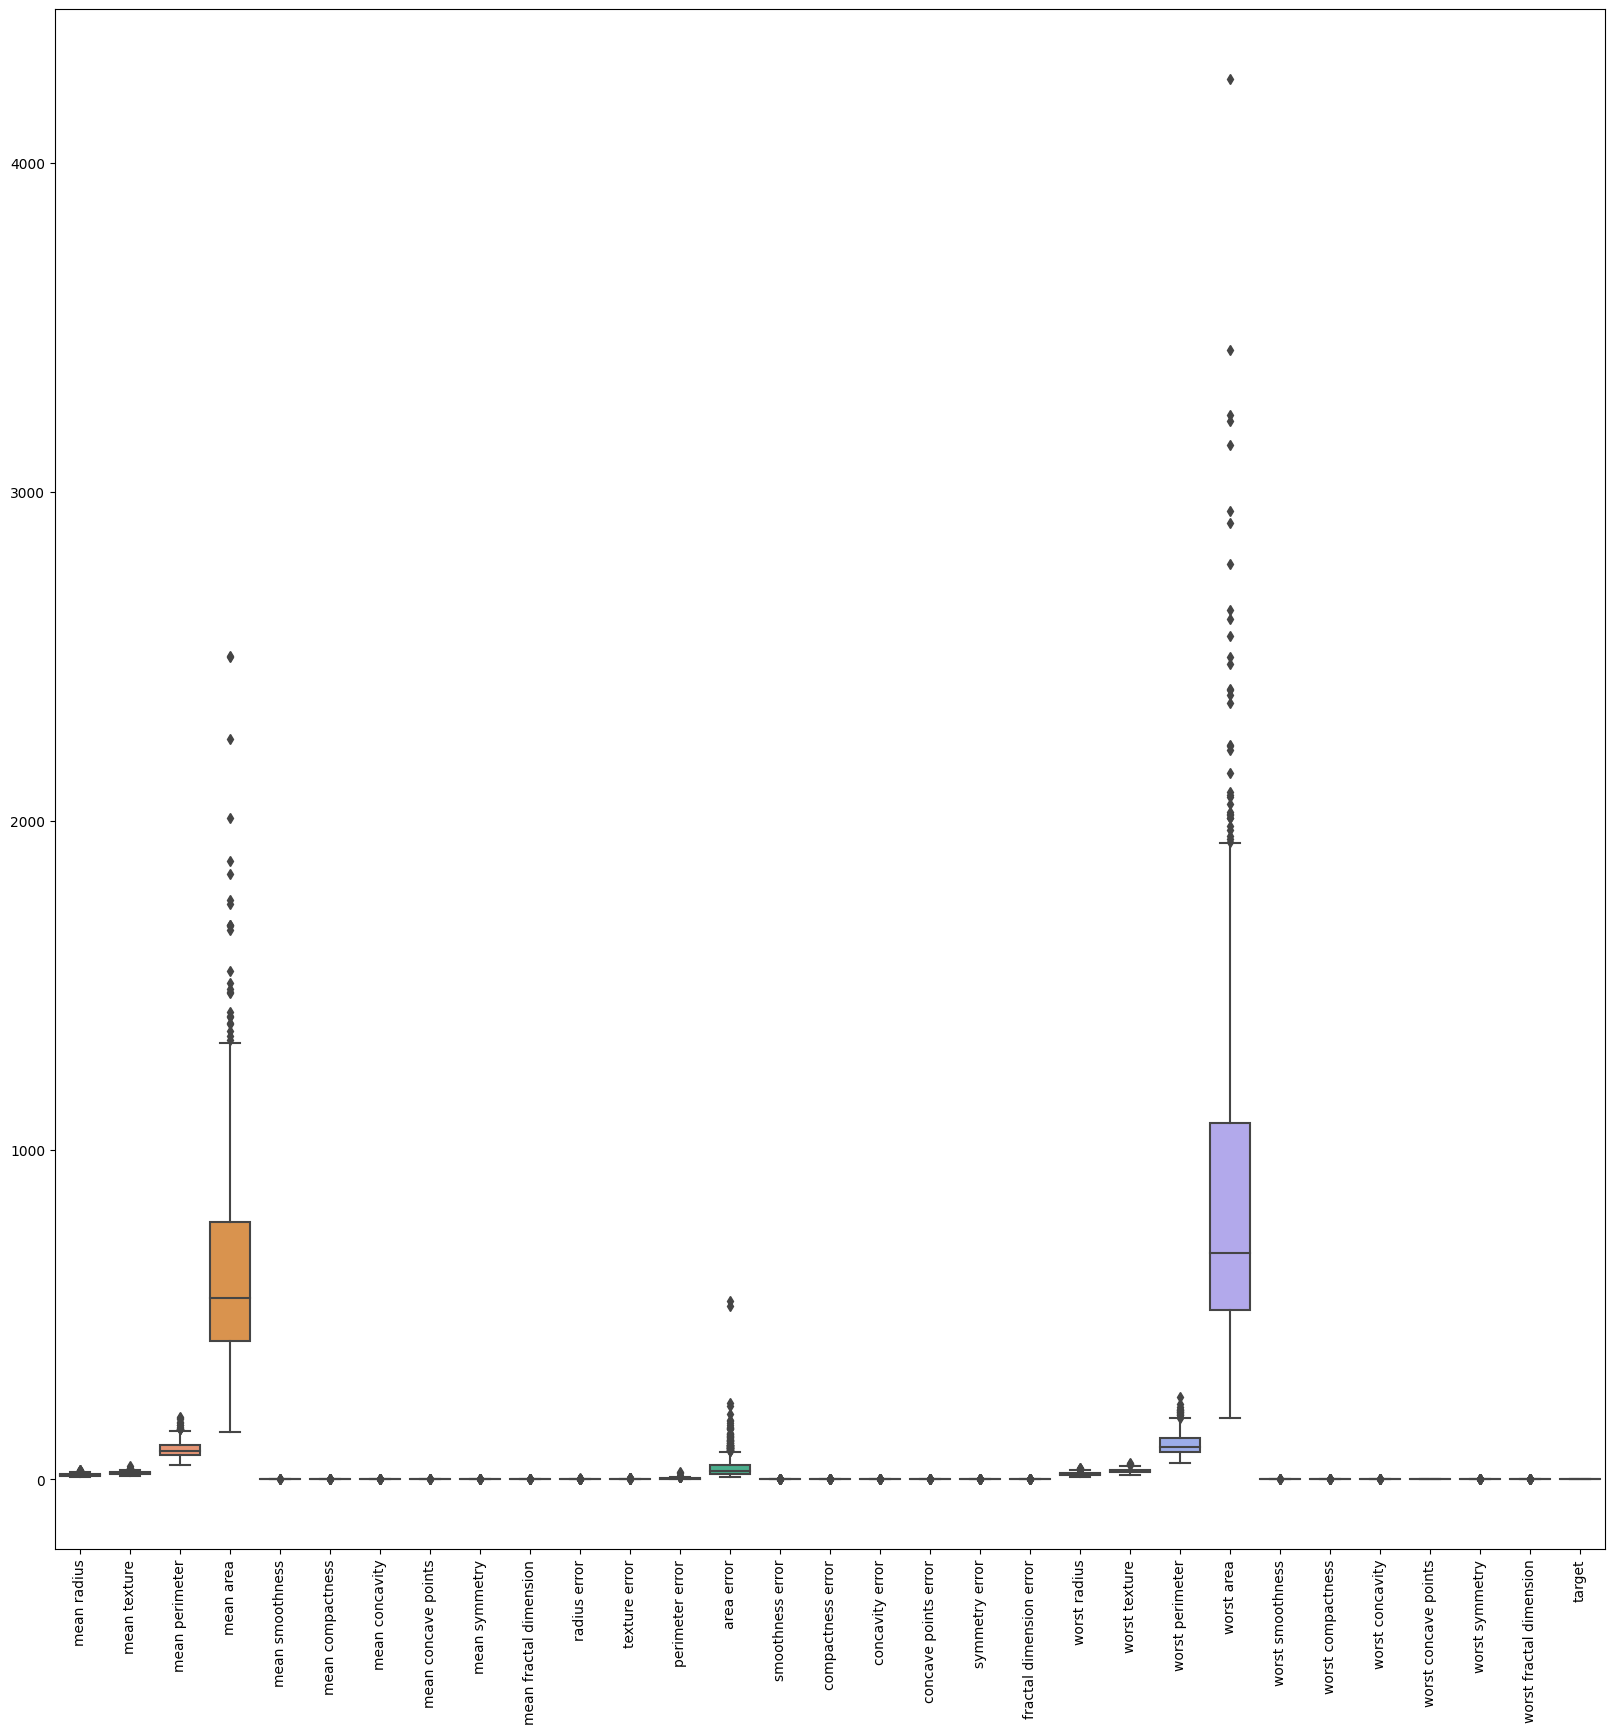

In [7]:
plt.figure(figsize=(20,20))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

<Axes: >

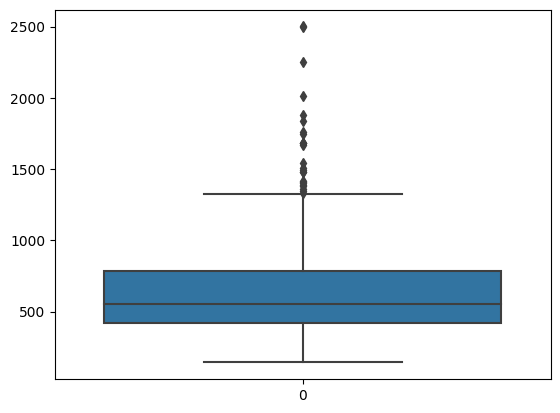

In [8]:
sns.boxplot(df['mean area'])

In [9]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<Axes: >

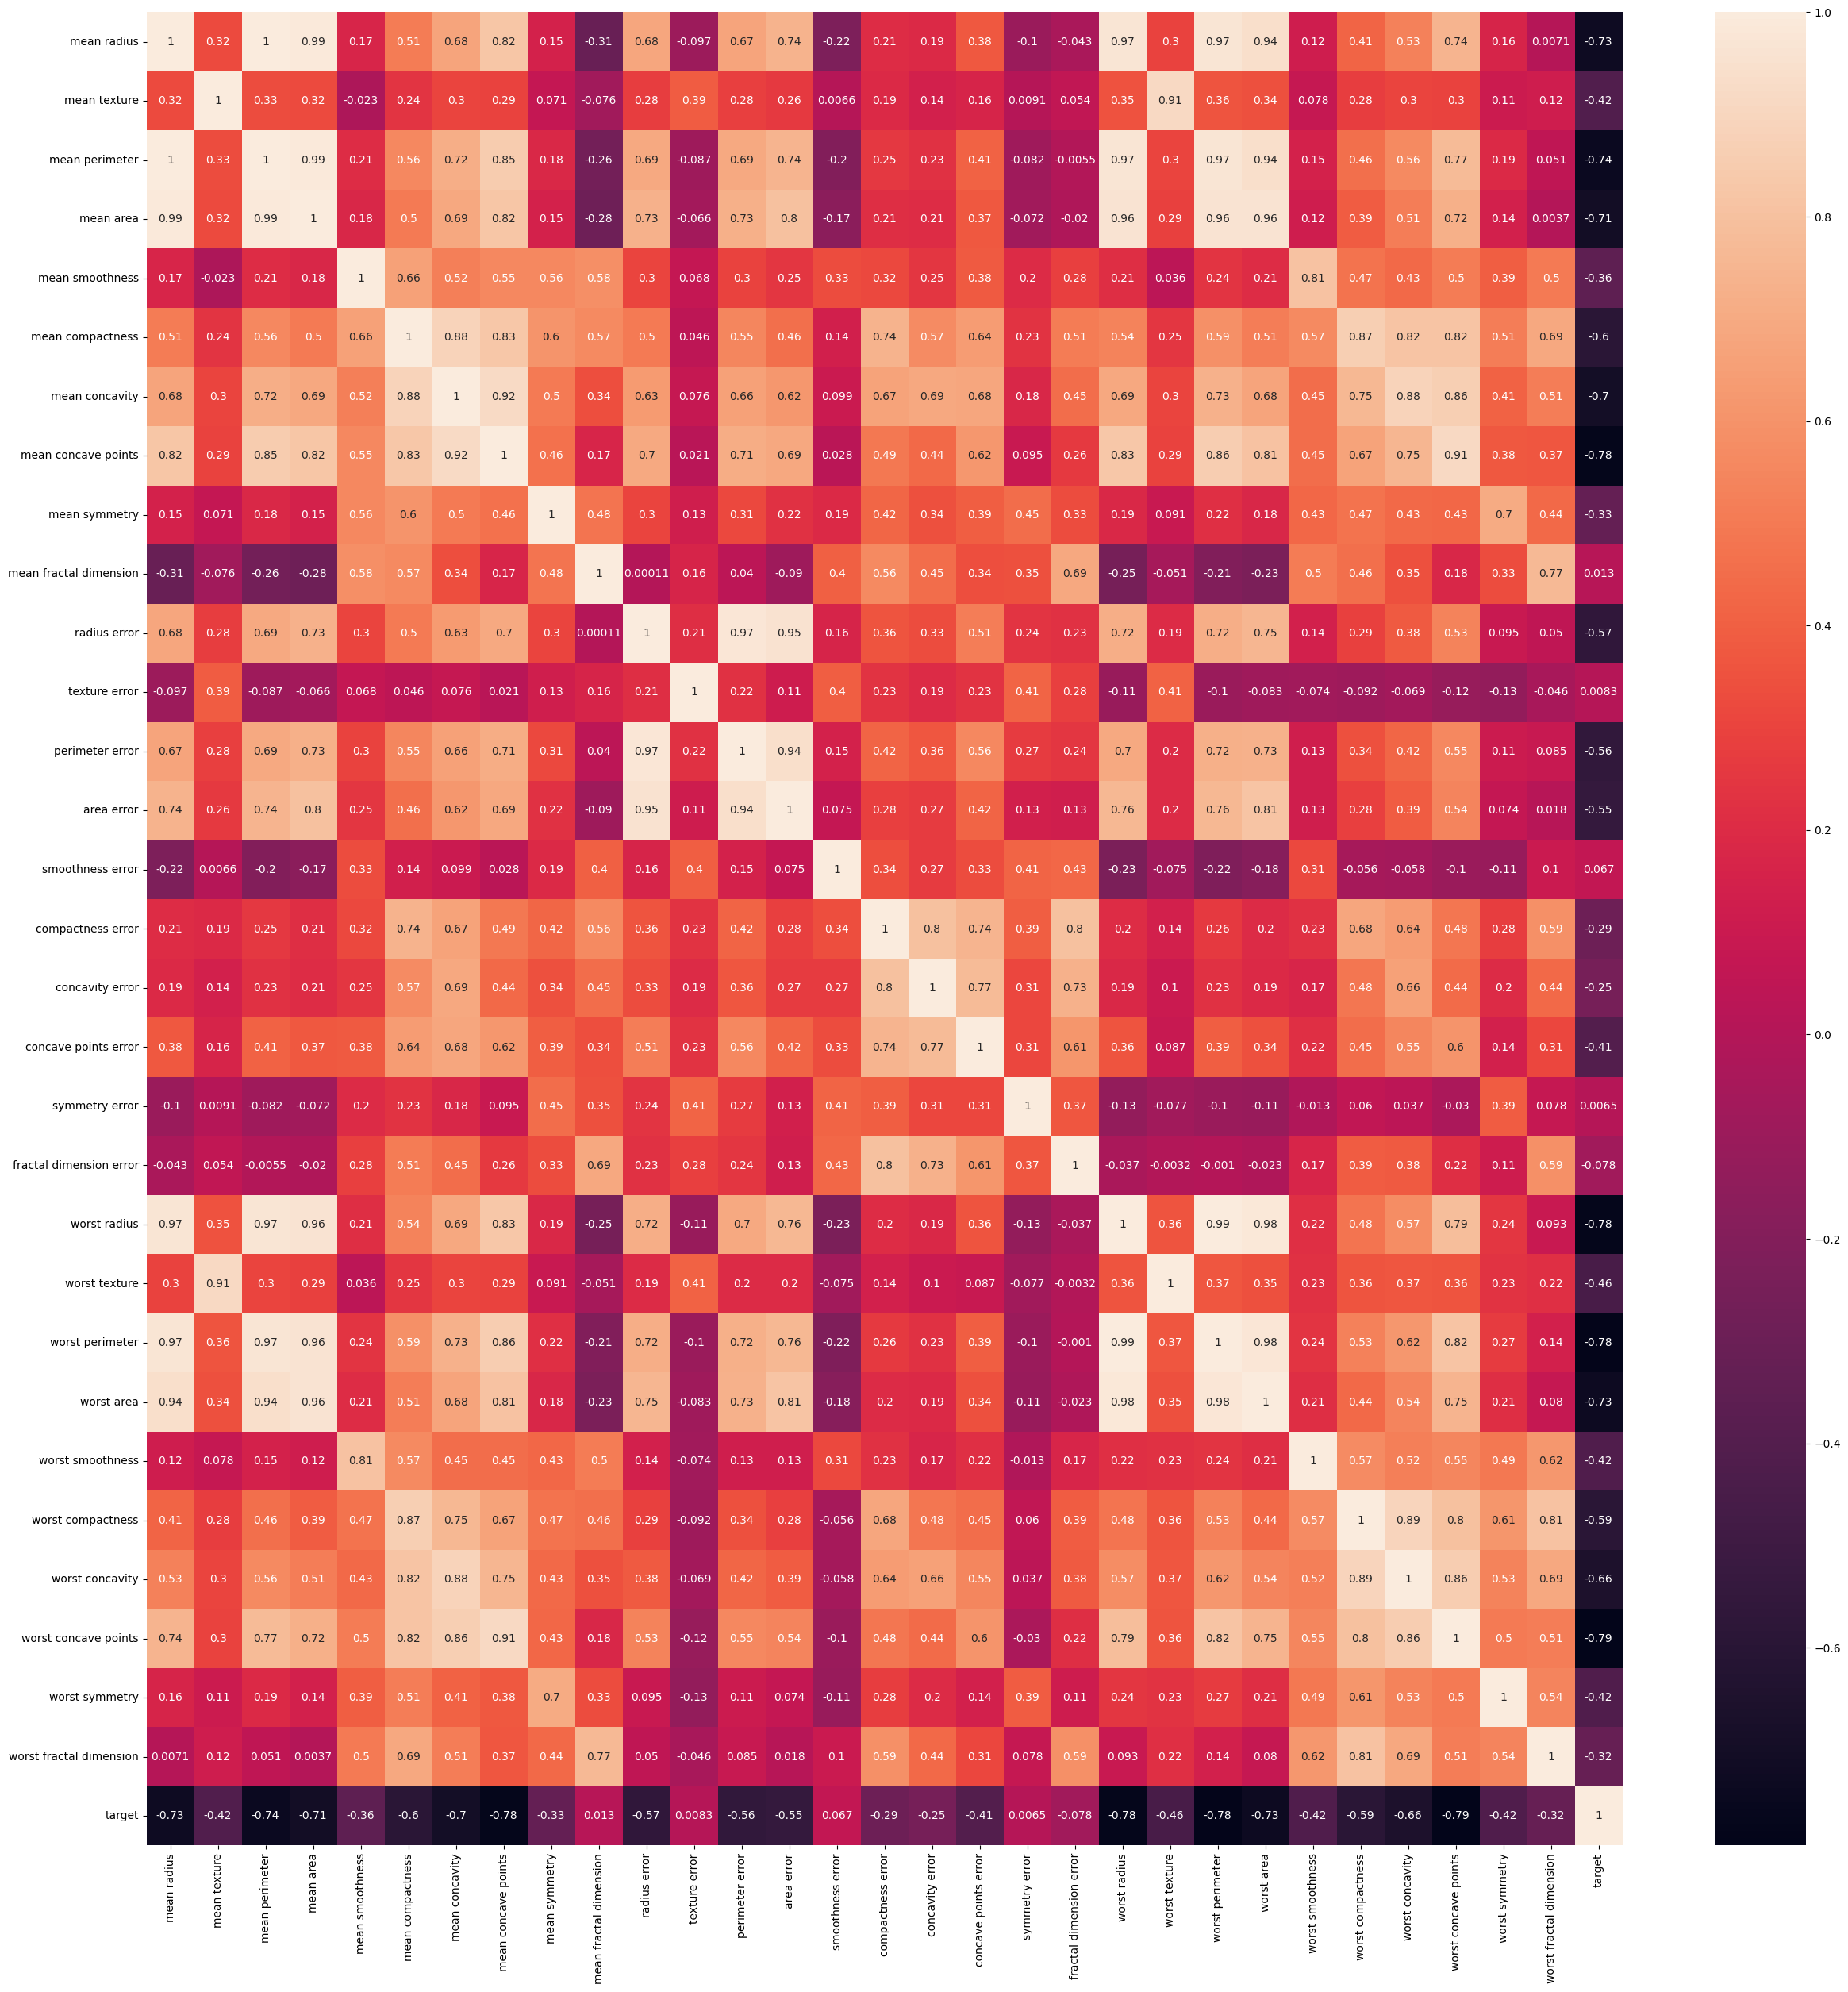

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [12]:
X=df.drop('target',axis=1)
y=df['target']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
scaled=StandardScaler()
X_train_scaled=scaled.fit_transform(X_train)
X_test_scaled=scaled.transform(X_test)

In [15]:
models={'LogisticRegression':LogisticRegression(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'RandomForestClassifier':RandomForestClassifier(),
        'SVC':SVC(),
        'KNeighborsClassifier':KNeighborsClassifier()}

In [16]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(name)
    print('-------------------------------------------------------')
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('-------------------------------------------------------')

LogisticRegression
-------------------------------------------------------
Accuracy Score: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

-------------------------------------------------------
DecisionTreeClassifier
-------------------------------------------------------
Accuracy Score: 0.9473684210526315
Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       1